In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

### Q1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Tobigs 22th/정규세션/week1/bacteria.csv")

In [ ]:
data.head()

,t,nt
0,1,355
1,2,211
2,3,197
3,4,166
4,5,142


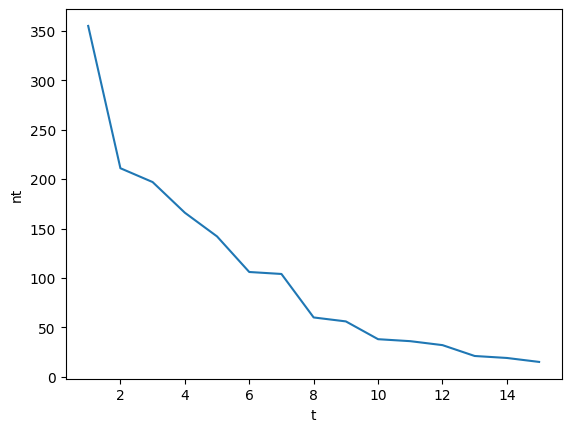

In [ ]:
# 데이터 추세 파악
plt.plot(data['t'], data['nt'])
plt.xlabel('t')
plt.ylabel('nt')
plt.show()

In [ ]:
model = LinearRegression()
model.fit(data[['t']], data['nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data[['t']])
standardized_residuals = (data['nt'] - fitted_values) / data['nt'].std()

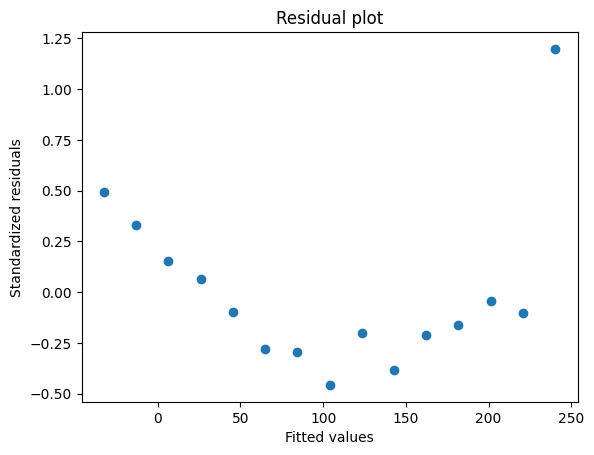

In [ ]:
# residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

bacteria 데이터에 단순 회귀 모형을 적용하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

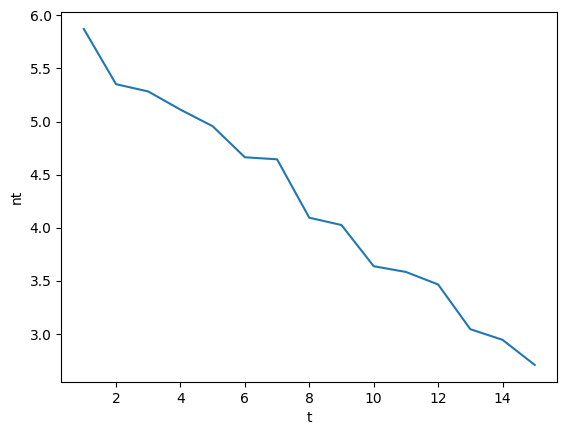

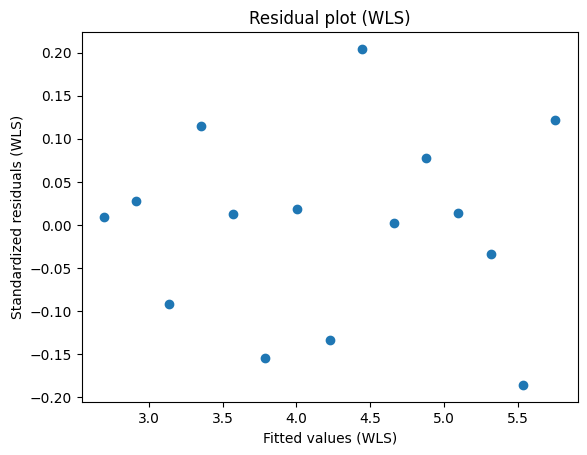

In [ ]:
# ans :

# 종속 변수에 로그 변환 적용
log_y = np.log(data['nt'])

# 데이터 추세 파악
plt.plot(data['t'], log_y)
plt.xlabel('t')
plt.ylabel('nt')
plt.show()

model = LinearRegression()
model.fit(data[['t']], log_y)

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data[['t']])
standardized_residuals = (log_y - fitted_values) / log_y.std()

# 가중치 계산
weights = 1 / fitted_values**2
model.fit(data[['t']], log_y, sample_weight=weights)

# WLS 모델 예측값과 표준화 잔차 계산
fitted_values_wls = model.predict(data[['t']])
standardized_residuals_wls = (log_y - fitted_values_wls) / log_y.std()

# Residual plot
plt.scatter(fitted_values_wls, standardized_residuals_wls)
plt.xlabel('Fitted values (WLS)')
plt.ylabel('Standardized residuals (WLS)')
plt.title('Residual plot (WLS)')
plt.show()

### Q2

In [ ]:
# 데이터 로드
data2 = pd.read_csv("/content/drive/MyDrive/Tobigs 22th/정규세션/week1/artificial1.csv")

In [ ]:
data2.head()

,X,Y
0,11.0142,24.8831
1,2.7066,14.7374
2,11.5839,64.0250
3,8.9989,16.1965
4,2.1201,7.3907


In [ ]:
# 선형 회귀 모형 적합
result1 = smf.ols('Y ~ X', data=data2).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values = result1.predict()
standardized_residuals = result1.get_influence().resid_studentized_internal

In [ ]:
# 요약 정보 출력
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     34.69
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           5.44e-08
Time:                        16:54:10   Log-Likelihood:                -352.93
No. Observations:                 100   AIC:                             709.9
Df Residuals:                      98   BIC:                             715.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0482      2.324      2.602      0.0

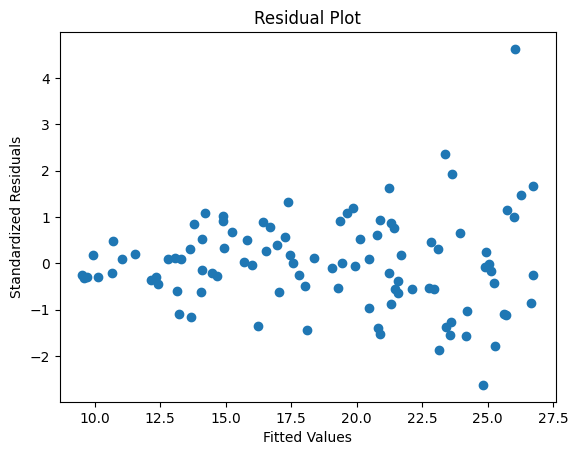

In [ ]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

artificial1데이터에 단순 회귀 모형을 피팅하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

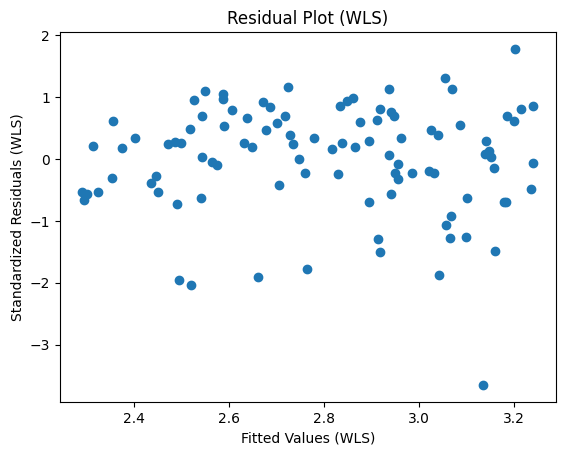

In [ ]:
# ans :

data2['log_Y'] = np.log(data2['Y'])

# 선형 회귀 모형 적합
result2 = smf.ols('log_Y ~ X', data=data2).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values_log = result2.predict()
standardized_residuals_log = result2.get_influence().resid_studentized_internal

# 가중치 계산
weights = 1 / (fitted_values_log**2)
data2['weights'] = weights
result3 = smf.wls('log_Y ~ X', data=data2, weights=data2['weights']).fit()

# WLS 모델 예측값과 표준화 잔차 계산
fitted_values_wls = result3.predict()
standardized_residuals_wls = (data2['log_Y'] - fitted_values_wls) / data2['log_Y'].std()

# Residual plot
plt.scatter(fitted_values_wls, standardized_residuals_wls)
plt.xlabel('Fitted Values (WLS)')
plt.ylabel('Standardized Residuals (WLS)')
plt.title('Residual Plot (WLS)')
plt.show()

### Q3. 단순회귀모델에서 등분산성이 위배되는 것이 문제가 되는 이유가 무엇인지에 대해서 강의 내용을 바탕으로 서술하여주세요.

ans : 등분산성은 독립 변수 X에 대한 종속 변수 Y의 분산, 즉 잔차의 분산이 일정하다는 것을 의미한다. 회귀 모델은 다양한 X의 값에 대해 일관된 예측 정확도를 유지해야 하기 때문에 단순회귀모델은 등분산성을 만족해야 한다. 등분산성이 만족되지 않으면 잔차에 정보가 남아 있어 이분산성이 나타나고, 이는 회귀계수의 표준오차에 영향을 미치기 때문에 문제가 된다. 따라서 등분산성 위배는 회귀 모델의 타당성을 떨어뜨리는 문제를 만든다.